## Q3(蒙特卡洛）

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [27]:
# Parameters
n = 20  # sample size
max_p = 9  # max number of features
train_size = int(0.7 * n)  
test_size = n - train_size 
sigma_values = [0.05, 0.3, 0.5, 0.8, 1]  # given sigma values
num_simulations = 200  # number of simulations for Monte Carlo
beta = np.array([0.5 + 0.5 * j / 25 for j in range(1, max_p+1)])  # beta values


In [28]:
# Initialize arrays to store the MSEs
train_mse = np.zeros((len(sigma_values), max_p))
test_mse = np.zeros((len(sigma_values), max_p))

In [29]:
for s_idx, sigma in enumerate(sigma_values):
    for simulation in range(num_simulations):
        # Generate the dataset
        X = np.random.normal(0, 1, (n, max_p))# 生成特征数据
        epsilon = np.random.normal(0, sigma, n)# 生成噪声
        y = X @ beta + epsilon# 生成响应变量

        # Split the dataset into train and test sets
        X_train, y_train = X[:train_size, :], y[:train_size]
        X_test, y_test = X[train_size:, :], y[train_size:]

        for p in range(1, max_p+1):
            # Train the model
            model = LinearRegression()
            model.fit(X_train[:, :p], y_train)

            # Predict and calculate MSE for train set
            y_train_pred = model.predict(X_train[:, :p])
            train_mse[s_idx, p-1] += mean_squared_error(y_train, y_train_pred)

            # Predict and calculate MSE for test set
            y_test_pred = model.predict(X_test[:, :p])
            test_mse[s_idx, p-1] += mean_squared_error(y_test, y_test_pred)


# Average the MSEs over the number of simulations
train_mse /= num_simulations
test_mse /= num_simulations

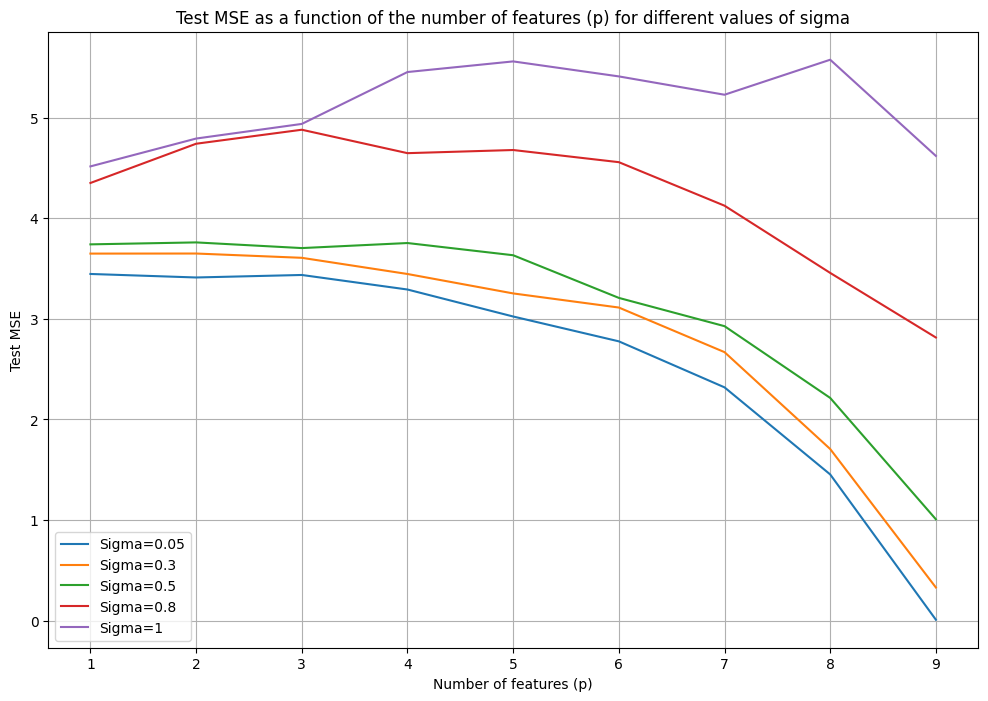

In [30]:
# Plotting the test MSE as a function of p for each sigma
plt.figure(figsize=(12, 8))
for s_idx, sigma in enumerate(sigma_values):
    plt.plot(range(1, max_p+1), test_mse[s_idx, :], label=f'Sigma={sigma}')   # F-string 创建字符串
plt.xlabel('Number of features (p)')
plt.ylabel('Test MSE')
plt.title('Test MSE as a function of the number of features (p) for different values of sigma')
plt.legend()
plt.grid(True)
plt.show()

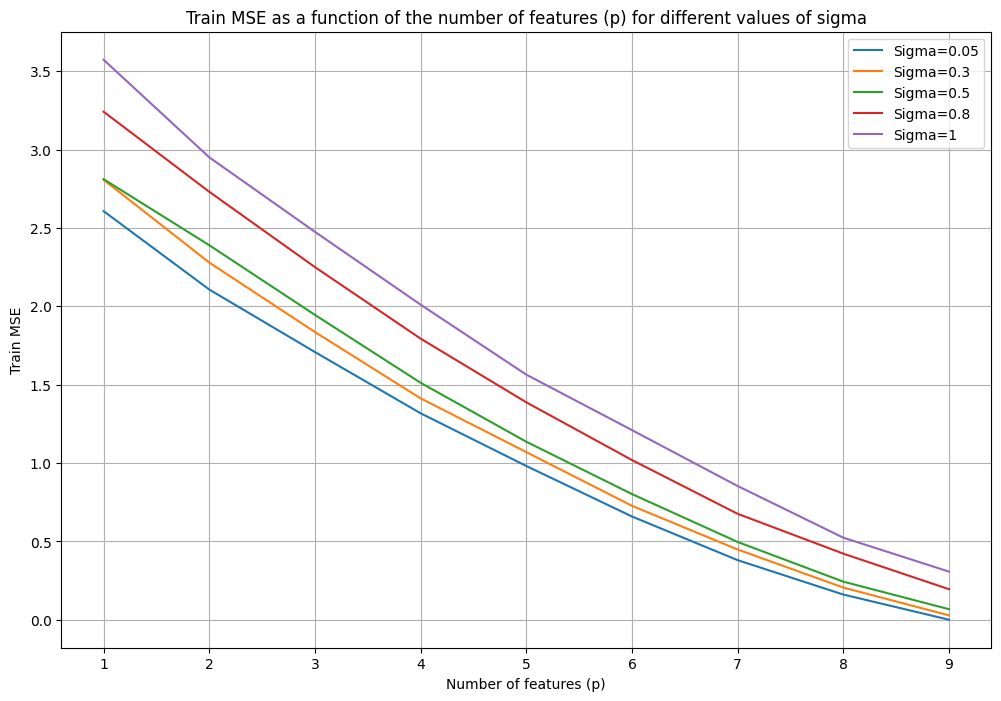

(array([9, 9, 9, 9, 1], dtype=int64), array([9, 9, 9, 9, 9], dtype=int64))

In [31]:
# Plotting the train MSE as a function of p for each sigma
plt.figure(figsize=(12, 8))
for s_idx, sigma in enumerate(sigma_values):
    plt.plot(range(1, max_p+1), train_mse[s_idx, :], label=f'Sigma={sigma}')
plt.xlabel('Number of features (p)')
plt.ylabel('Train MSE')
plt.title('Train MSE as a function of the number of features (p) for different values of sigma')
plt.legend()
plt.grid(True)
plt.show()

# Finding the optimal p for each sigma based on minimum test MSE
optimal_p_test = np.argmin(test_mse, axis=1) + 1  # Adding 1 because index starts at 0

# Finding the optimal p for each sigma based on minimum train MSE
optimal_p_train = np.argmin(train_mse, axis=1) + 1  # Adding 1 because index starts at 0

optimal_p_test, optimal_p_train

In the plot above, we can see the left side of the curve (where MSE is high) indicates underfitting, when the numbers of features(p) goes up, we let the train MSE down and Test MES down. There's a Tradeoff between variance and bias, when the numbers of features(p) goesup, we always have the bias down cause there'll be  underfitting in our model, but the variance may goes up when we adding features , so there's a U-curve on the plot of Test MSE, which is what we really consern.

The U-curve is not typical at all in my results, that may causes from the fact that our sample number is small

As σ (the noise level) increases, the optimal number of features tends to increase. This might be because, with more noise, the model needs more features to capture the underlying pattern

## Q4 LOOCV

In [10]:
# Set random seed for reproducibility
np.random.seed(0)

# Generate n=100 independent random variables from N(0, 1)
n = 100
x = np.random.normal(0, 1, n)    # 特征变量
epsilon = np.random.normal(0, 1, n)  # 误差项

# Define the true model
y = x - 2 * x ** 2 + epsilon

# Initialize variables to store LOOCV errors for each model
loocv_errors = []

# Define a function to compute the LOOCV error for a given model
def compute_loocv_error(X, y):
    loocv_error = 0 # 初始化LOOCV误差为0
    for i in range(len(y)):
        # Define train and test sets for LOOCV
        X_train = np.delete(X, i, axis=0)# 删除当前点，其余作为训练集
        y_train = np.delete(y, i)
        X_test = X[i].reshape(1, -1)# 当前点作为测试集
        y_test = y[i]
        
        # Fit the model
        model = LinearRegression().fit(X_train, y_train)
        
        # Predict and compute error for the held-out point
        y_pred = model.predict(X_test)
        loocv_error += (y_test - y_pred) ** 2
    
    # Return the average LOOCV error
    return loocv_error / len(y)

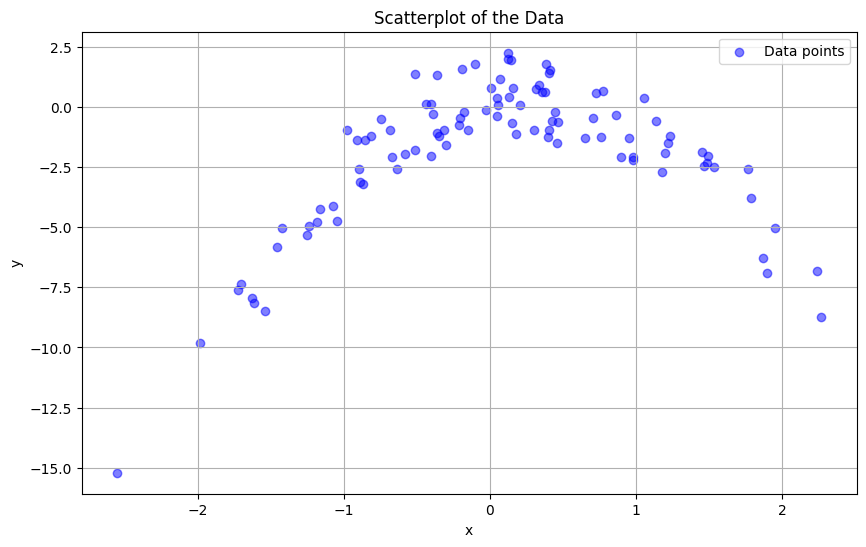

[]

In [11]:
# Create a scatterplot of the data
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.5, label='Data points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatterplot of the Data')
plt.legend()
plt.grid(True)
plt.show()

loocv_errors

In [12]:
# Fit the four models and compute their LOOCV errors
for degree in range(1, 5):
    # Prepare the data matrix with powers of x up to the current degree
    X = np.vander(x, degree + 1, increasing=True)
    
    # Compute and store the LOOCV error for the current model
    loocv_error = compute_loocv_error(X, y)
    loocv_errors.append(loocv_error)

loocv_errors

[array([8.88820583]),
 array([1.11615319]),
 array([1.16222588]),
 array([1.14714794])]

In [25]:
##计算different degrees的LOOCV

# Set a new random seed for reproducibility
np.random.seed(42)

# Generate n=100 independent random variables from N(0, 1)
x_new = np.random.normal(0, 1, n)
epsilon_new = np.random.normal(0, 1, n)

# Define the true model with the new random variables
y_new = x_new - 2 * x_new ** 2 + epsilon_new

# Initialize variables to store LOOCV errors for each model
loocv_errors_new = []

# Fit the four models and compute their LOOCV errors
for degree in range(1, 5):
    # Prepare the data matrix with powers of x up to the current degree
    X_new = np.vander(x_new, degree + 1, increasing=True)# 准备当前度数的数据矩阵
    
    # Compute and store the LOOCV error for the current model
    loocv_error_new = compute_loocv_error(X_new, y_new)
    loocv_errors_new.append(loocv_error_new)

loocv_errors_new

[array([5.30295663]),
 array([0.9127642]),
 array([0.9569573]),
 array([0.97277247])]

y=β0+β1x+β2x ^2+u has the smallest LOOCV losses in (a), also , the smallest LOOCV error for the quadratic model aligns with my expectations based on the true data-generating process and the principles of the bias-variance trade-off. It correctly identifies the structure of the data without overfitting, resulting in the best predictive performance according to the LOOCV criterion.

In [27]:
## fit every single degrees' models

import statsmodels.api as sm
# Redefine the data generation since the code execution state was reset
np.random.seed(0)
n = 100
x = np.random.normal(0, 1, n)
epsilon = np.random.normal(0, 1, n)
y = x - 2 * x ** 2 + epsilon

# Initialize variable to store the results
model_stats = []

# Fit the four models and compute their statistics
for degree in range(1, 5):
    # Prepare the data matrix with powers of x up to the current degree
    X = np.vander(x, degree + 1, increasing=True)
    X = sm.add_constant(X)  # Add a constant term for the intercept
    
    # Fit the model using OLS
    model = sm.OLS(y, X).fit()
    
    # Get the summary of the model
    model_summary = model.summary()
    
    model_stats.append(model_summary)

model_stats

[<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                      y   R-squared:                       0.085
 Model:                            OLS   Adj. R-squared:                  0.076
 Method:                 Least Squares   F-statistic:                     9.087
 Date:                Thu, 18 Jan 2024   Prob (F-statistic):            0.00328
 Time:                        18:13:23   Log-Likelihood:                -247.08
 No. Observations:                 100   AIC:                             498.2
 Df Residuals:                      98   BIC:                             503.4
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

### Interpretation:
Model 1 shows significant coefficients for both the intercept and x, but the LOOCV error is high, suggesting that it may not be adequately capturing the true relationship (possibly underfitting).
Model 2 shows a significant coefficient on x, consistent with the real data generation process. This model has the lowest LOOCV error, indicating good predictive performance and alignment with the true model structure.
Models 3 and 4 introduce higher order terms. While the coefficients on x and X-squared are significant, the higher order terms are not significant, indicating that they may not contribute substantially to the model. This is consistent with the LOOCV results, suggesting that these models may be overfitting the data.